In [20]:
# import hierarchical clustering libraries
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler , normalize
from sklearn.preprocessing import  MinMaxScaler
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [2]:
crimedata=pd.read_csv("D:/Work/Data Science and Analyst Course/ExcelR/Data Science/Assignments/7_Clustering/crime_data.csv")
crimedata.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


### Hierarchical Clustering

In [3]:
#Standardizing the DataFrame
scaler  = StandardScaler()
scaler_df = scaler.fit_transform(crimedata.iloc[:,1:])

#Normalize the DataFrame
df_norm = normalize(scaler_df)

df_norm = pd.DataFrame(df_norm,columns=crimedata.columns[1:])
df_norm.head()

,Murder,Assault,UrbanPop,Rape
0,0.797407,0.502382,-0.334288,-0.002192
1,0.168146,0.366453,-0.401198,0.822484
2,0.034635,0.715011,0.483014,0.504239
3,0.204249,0.202947,-0.943754,-0.162553
4,0.092541,0.419963,0.584950,0.687677


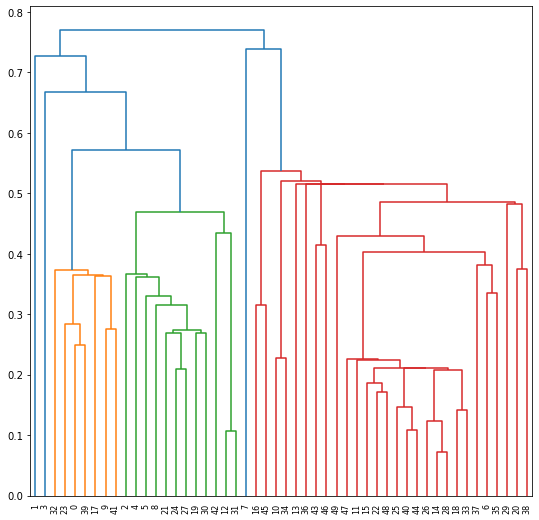

In [4]:
# create dendrogram
plt.figure(figsize=(9,9))
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='single'))

In [34]:
hc = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="single")

In [35]:
clusters = hc.fit_predict(df_norm)

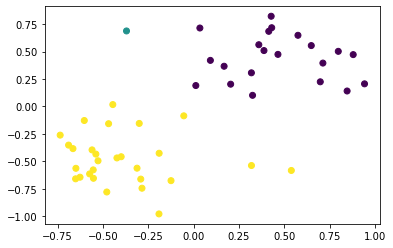

In [36]:
plt.scatter(df_norm["Murder"],df_norm["Assault"] , c=clusters)

In [37]:
clusters

array([0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0,
       2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2], dtype=int64)

In [38]:
crimedata["h_cluster_id"] = hc.labels_

In [39]:
crimedata

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_cluster_id,clusterid_new
0,Alabama,13.2,236,58,21.2,0,1
1,Alaska,10.0,263,48,44.5,0,2
2,Arizona,8.1,294,80,31.0,0,2
3,Arkansas,8.8,190,50,19.5,0,1
4,California,9.0,276,91,40.6,0,2
5,Colorado,7.9,204,78,38.7,0,2
6,Connecticut,3.3,110,77,11.1,2,0
7,Delaware,5.9,238,72,15.8,1,0
8,Florida,15.4,335,80,31.9,0,2
9,Georgia,17.4,211,60,25.8,0,1


### K-Means Clustering

In [11]:
# How to find optimum number of  cluster
#The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

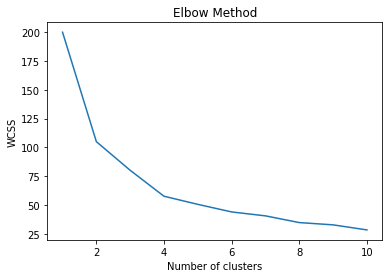

In [43]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaler_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [40]:
wcss

[200.0,
 104.96163315756871,
 80.0888613219962,
 57.55425863091104,
 50.52026552535068,
 43.927464044975736,
 40.52183461131976,
 34.68738839784909,
 32.70648136388185,
 28.31163939712256]

In [41]:
kmeans.inertia_

28.31163939712256

In [13]:
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(scaler_df)

KMeans(n_clusters=4, random_state=42)

In [14]:
clusters_new.labels_

array([1, 2, 2, 1, 2, 2, 0, 0, 2, 1, 0, 3, 2, 0, 3, 0, 3, 1, 3, 2, 0, 2,
       3, 1, 2, 3, 3, 2, 3, 0, 2, 2, 1, 3, 0, 0, 0, 0, 0, 1, 3, 1, 2, 0,
       3, 0, 0, 3, 3, 0])

In [16]:
#Assign clusters to the data set
crimedata['clusterid_new'] = clusters_new.labels_

In [17]:
#these are standardized values.
clusters_new.cluster_centers_

array([[-0.49440658, -0.3864845 ,  0.58167593, -0.26431024],
       [ 1.42622412,  0.88321132, -0.82279055,  0.01946669],
       [ 0.70212683,  1.04999438,  0.72997363,  1.28990383],
       [-0.97130281, -1.11783581, -0.93954982, -0.97657842]])

In [18]:
crimedata.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Murder,Assault,UrbanPop,Rape,h_cluster_id
,,mean,mean,mean,mean,mean
0,0,5.656250,138.875000,73.875000,18.781250,1.9375
1,1,13.937500,243.625000,53.750000,21.412500,0.0000
2,2,10.815385,257.384615,76.000000,33.192308,0.0000
3,3,3.600000,78.538462,52.076923,12.176923,2.0000


In [19]:
crimedata

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_cluster_id,clusterid_new
0,Alabama,13.2,236,58,21.2,0,1
1,Alaska,10.0,263,48,44.5,0,2
2,Arizona,8.1,294,80,31.0,0,2
3,Arkansas,8.8,190,50,19.5,0,1
4,California,9.0,276,91,40.6,0,2
5,Colorado,7.9,204,78,38.7,0,2
6,Connecticut,3.3,110,77,11.1,2,0
7,Delaware,5.9,238,72,15.8,1,0
8,Florida,15.4,335,80,31.9,0,2
9,Georgia,17.4,211,60,25.8,0,1


### DBSCAN Algorithm

In [49]:
dbscan = DBSCAN(eps=2, min_samples=5)
dbscan.fit(df_norm)

DBSCAN(eps=2)

In [50]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [51]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [52]:
cl

,cluster
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [48]:
pd.concat([crimedata,cl],axis=1)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,h_cluster_id,clusterid_new,cluster
0,Alabama,13.2,236,58,21.2,0,1,0
1,Alaska,10.0,263,48,44.5,0,2,0
2,Arizona,8.1,294,80,31.0,0,2,0
3,Arkansas,8.8,190,50,19.5,0,1,0
4,California,9.0,276,91,40.6,0,2,0
5,Colorado,7.9,204,78,38.7,0,2,0
6,Connecticut,3.3,110,77,11.1,2,0,0
7,Delaware,5.9,238,72,15.8,1,0,0
8,Florida,15.4,335,80,31.9,0,2,0
9,Georgia,17.4,211,60,25.8,0,1,0


#### Inferences
The hierarichal method is not eddicient while dealing with large datasets

In k-means, elbow method is used to find optimum value of clusters. Here, the optimum value is 4.

